###### Linear Regression using Normal Equation

In [49]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


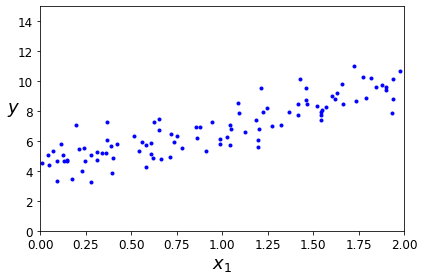

In [50]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [51]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [52]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [53]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

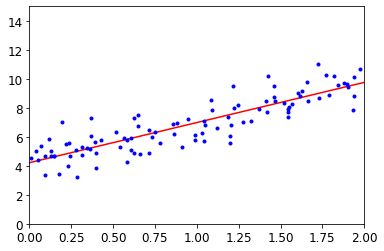

In [54]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Saving figure linear_model_predictions_plot


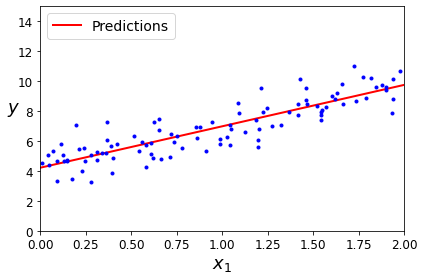

In [55]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

### Theta_hat = (X^T*X)^-1 * X^T * y

In [56]:
x = np.array([[1, 2104, 5, 1, 45],
        [1, 1416, 3, 2, 40],
        [1, 1534, 3, 2, 30],
        [1, 852, 2, 1, 36]])

In [57]:
y = [460, 232, 315, 178]

In [58]:
#x transpose
x_t = x.transpose()

In [59]:
# (X^T)*X
x_t_x = np.dot(x_t, x)

In [60]:
# (x^T)*y
x_t_y = np.dot(x_t, y)

In [ ]:
x_t_x_inv = np.linalg.inv(x_t_x)

In [62]:
theta = np.dot(x_t_x, x_t_y)

In [63]:
theta

array([-1472135849,    82521828,  2067272606,   -66766305, -1771189588])

###### Linear Regression using normal equation (In-depth) 

In [65]:
from numpy import genfromtxt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [67]:
data = genfromtxt('E:/portland.txt', delimiter=',')

In [69]:
data

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [70]:
area = data[:, 0]

In [72]:
rooms = data[:, 1]

In [73]:
price = data[:, 2]

In [74]:
def fitTheta(feature, price):
    return np.dot(theta, feature)

In [75]:
def visualizeFeature(feature, featureLabel, thetaVal=None):
    fig = plt.figure(figsize=(20, 10))
    
    plt.rcParams.update({'font.size': 10})
    
    plt.xlabel(featureLabel, fontsize=15)
    
    plt.ylabel("Price", fontsize=15)
    
    plt.scatter(feature, price, color="red", s=75)
    
    if(thetaVal):
    
        thetaFit = fitTheta(feature, thetaVal)
        
        plt.plot(feature, thetaFit)

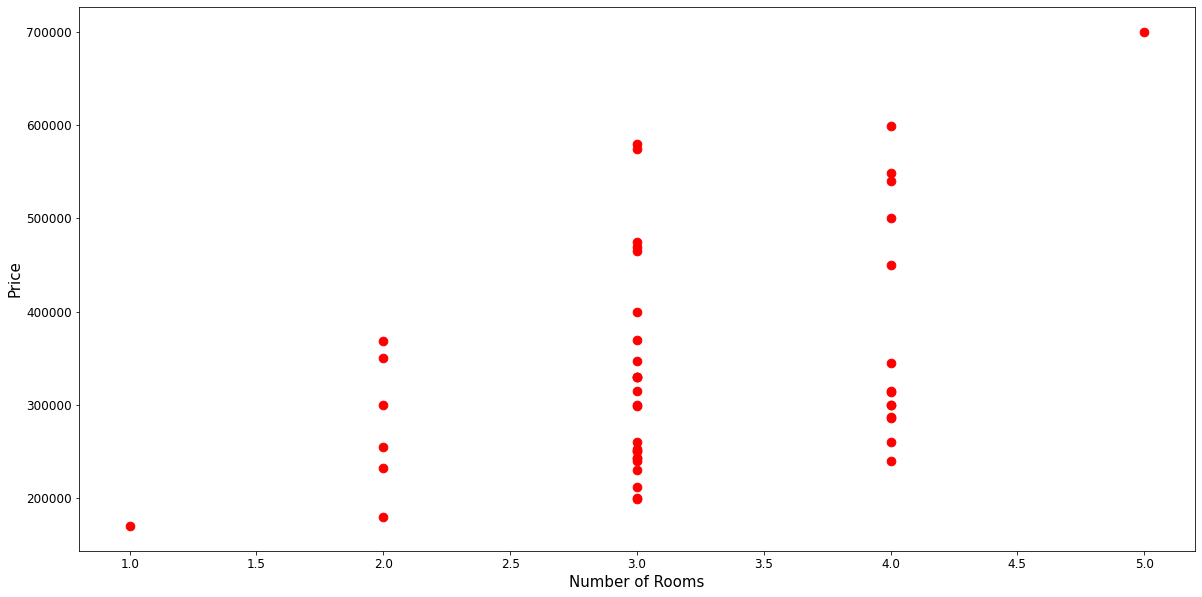

In [77]:
visualizeFeature(rooms, "Number of Rooms")

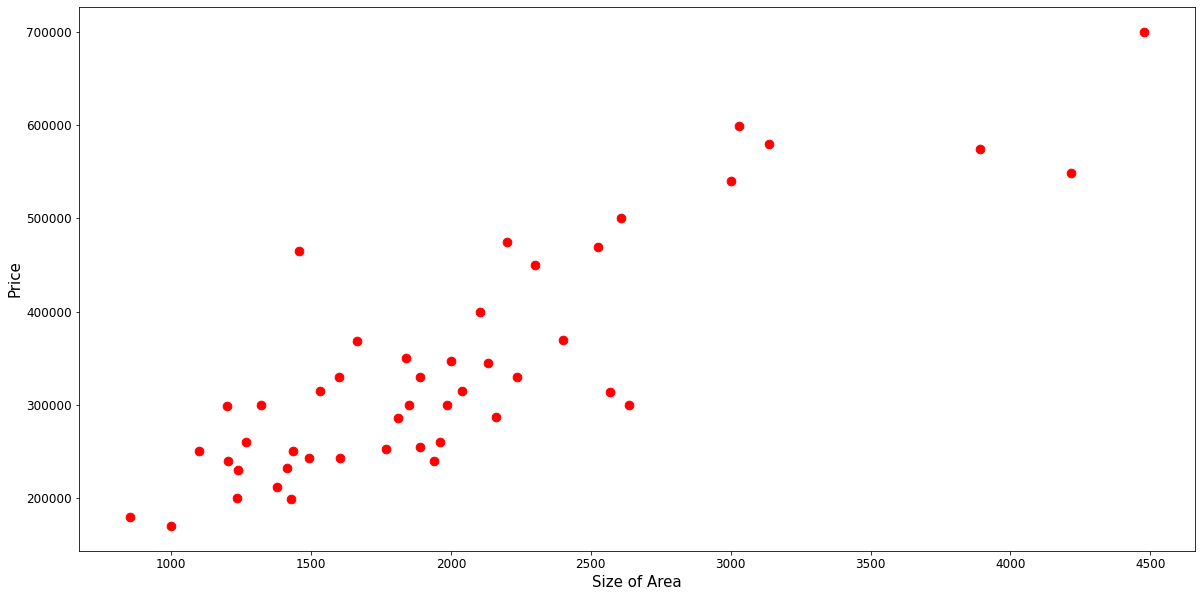

In [79]:
visualizeFeature(area, "Size of Area")

###### the relationship between the Number of Rooms, and the Price of the House, appears to be Linear.

###### Define Feature Matrix, and Outcome/Target Vector:

In [82]:
x_data = data[:, 0:2] # feature matrix, i.e, area size and room number

In [83]:
y = data[:, 2] #Outcome / target vector, i.e, price

In [102]:
def getMSE(feature, thetaRange):
    costMatrix = np.repeat(price, thetaRange.shape[0]).reshape(price.shape[0], thetaRange.shape[0])
    
    costs = np.dot(np.asmatrix(feature).T, np.asmatrix(thetaRange)) - costMatrix
    
    MSE = (np.array((np.sum(costs, 0)))**2)/(2*price.shape[0])
    
    return np.array(MSE)[0]

In [103]:
def visualizeLoss(feature, featureName, startInterval, endInterval, stepSize=0.5, thetaVal=None):
    thetaRange = np.arange(startInterval, endInterval, stepSize)
    
    Loss = getMSE(feature, thetaRange)
    
    fig = plt.figure(figsize=(20, 10))
    
    plt.title("Loss Function for the Feature: {}".format(featureName), fontsize=25)
    
    plt.ylabel("Cost Function, J(Θ)", fontsize=15)
    
    plt.xlabel("Weight(s), Θ", fontsize=15)
    
    plt.plot(thetaRange, Loss, zorder=1)
    
    if(thetaVal):
    
        thetaLoss = getMSE(feature, np.array(thetaVal).reshape(1, 1))
        
        plt.scatter(thetaVal, thetaLoss, marker="x", linewidth=5, color="red", s=200, zorder=2)
        
        plt.annotate("Theta = {}".format(thetaVal), (thetaVal, thetaLoss), fontsize=25)

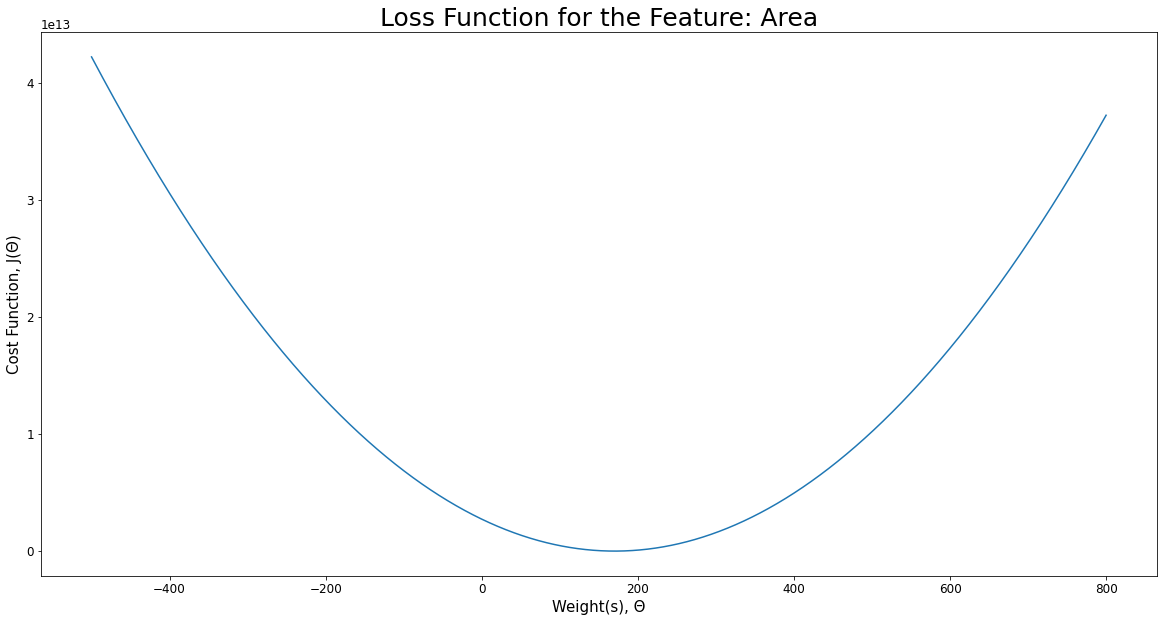

In [88]:
visualizeLoss(area, "Area", -500, 800)

47


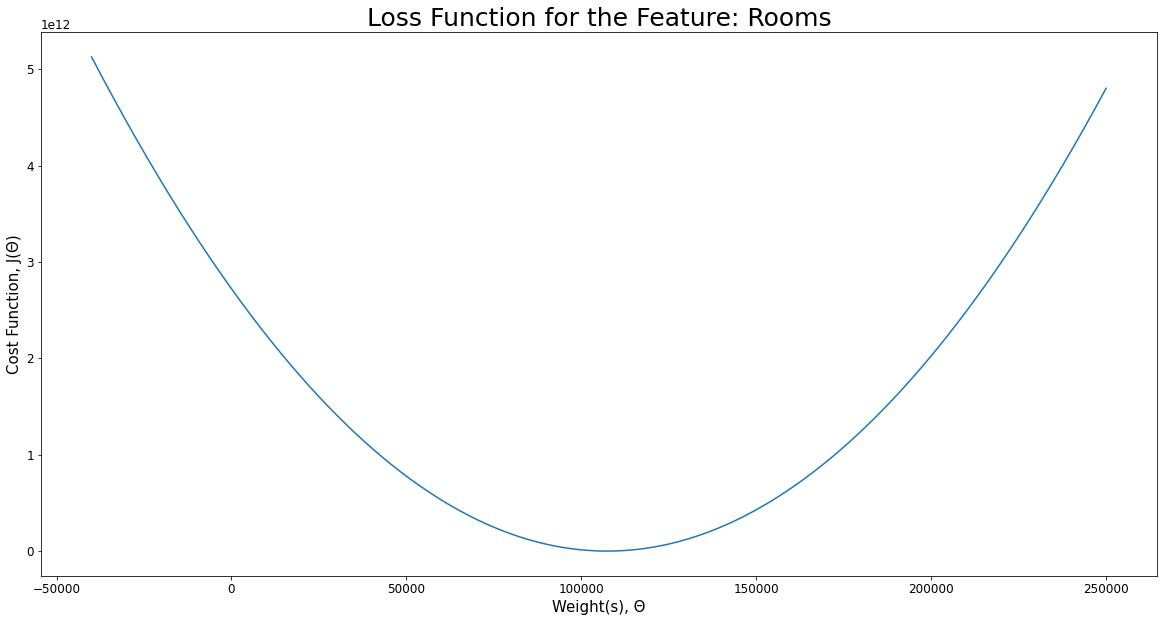

In [118]:
visualizeLoss(rooms, "Rooms", -40000, 250000)

###### split data

In [119]:
X_data = data[:, 0:2]

In [120]:
y = data[:, 2]

In [121]:
X = np.c_[np.ones(X_data.shape[0]), X_data]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [143]:
X_test

array([[1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 2.238e+03, 3.000e+00],
       [1.000e+00, 1.664e+03, 2.000e+00],
       [1.000e+00, 1.203e+03, 3.000e+00],
       [1.000e+00, 8.520e+02, 2.000e+00],
       [1.000e+00, 2.637e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 1.437e+03, 3.000e+00],
       [1.000e+00, 1.767e+03, 3.000e+00],
       [1.000e+00, 1.239e+03, 3.000e+00]])

In [126]:
firstTerm = np.linalg.inv(np.dot(X_train.T, X_train))

In [127]:
secondTerm = np.dot(X_train.T, y_train)

In [128]:
theta = np.dot(firstTerm, secondTerm)

In [130]:
theta

array([104565.65172421,    144.15885542, -14319.42964356])

47
47


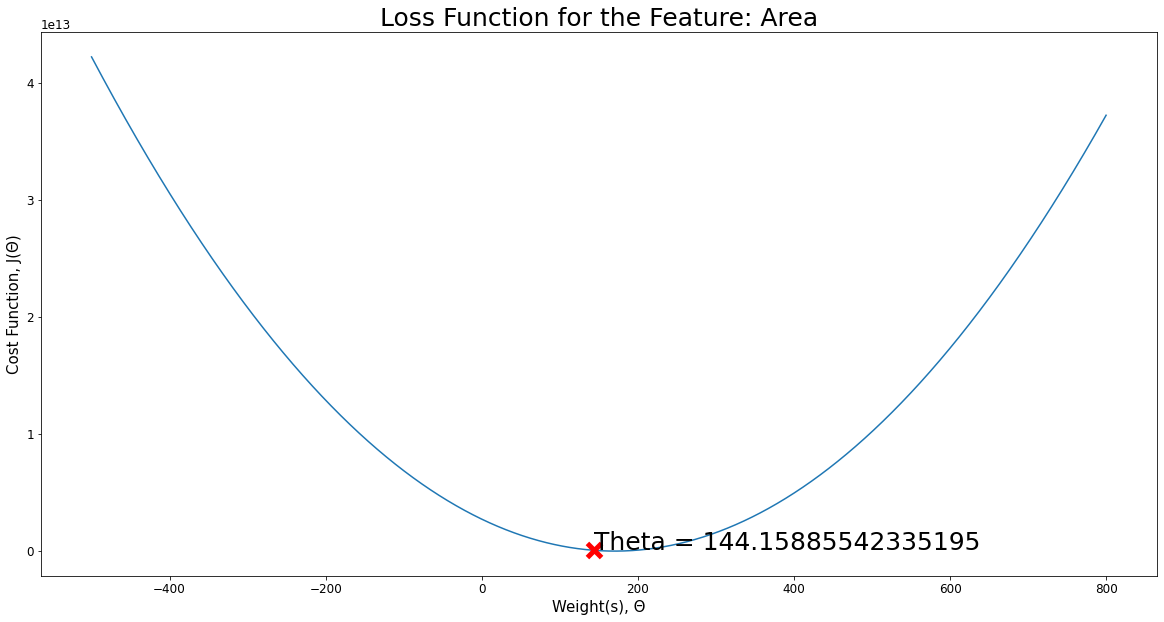

In [131]:
visualizeLoss(area, "Area", -500, 800, thetaVal=theta[1])

ValueError: shapes (3,) and (47,) not aligned: 3 (dim 0) != 47 (dim 0)

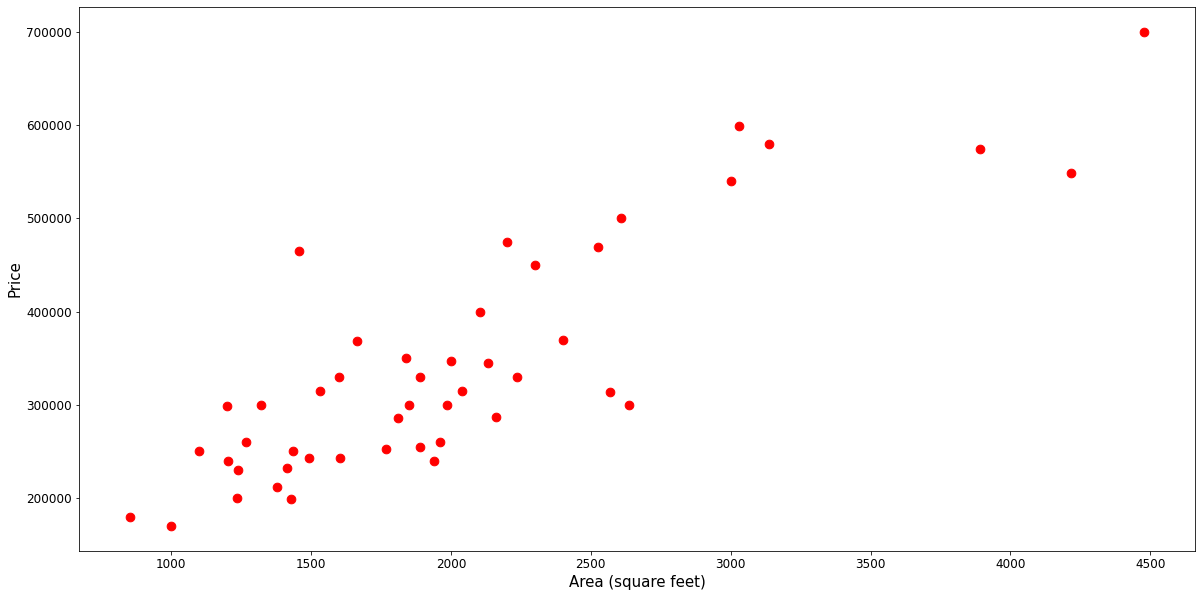

In [135]:
visualizeFeature(area, "Area (square feet)", thetaVal=theta[1])

In [137]:
normal_predictions = np.dot(X_test, theta)

In [138]:
normal_predictions

array([407588.61580957, 384234.88123098, 315807.12786154, 235030.46586781,
       198750.13725778, 441754.2645449 , 280055.73171655, 268763.63803688,
       316336.06032658, 240220.18466305])